In [ ]:
import numpy as np
import pandas as pd
import os
import pickle
import time
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/applied machine learning/Fastai/chapter 7/Book-Recommendation/data set'

# List all CSV files in the directory
csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]

# Create a dictionary to store the DataFrames
dataframes = {}

# Read each CSV file into a DataFrame and store it in the dictionary
for file in csv_files:
    # Extract the base name of the file (without extension) to use as the key
    base_name = os.path.splitext(file)[0]

    # Read the CSV file into a DataFrame
    dataframes[base_name] = pd.read_csv(os.path.join(path, file))

# Display the first few rows of each DataFrame
for name, df in dataframes.items():
    print(f"DataFrame: {name}")



DataFrame: Ratings
DataFrame: Users
DataFrame: Books


<ipython-input-3-d59ff880f773>:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[base_name] = pd.read_csv(os.path.join(path, file))


In [ ]:
# Example: Access a specific DataFrame
books_df = dataframes.get('Books')
ratings_df = dataframes.get('Ratings')

In [ ]:
books_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [ ]:
print(ratings_df['Book-Rating'].max(), ratings_df['Book-Rating'].unique())
ratings_df.head(3)

10 [ 0  5  3  6  8  7 10  9  4  1  2]


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [ ]:
print(f'Book dataframe\'s shape is {books_df.shape}')
print('Ratings\'s shape is: {}'.format(ratings_df.shape))

Book dataframe's shape is (271360, 8)
Ratings's shape is: (1149780, 3)


In [ ]:
print('Null values in books dataframe are as follows:')
print('**********************************************')
print(books_df.isnull().sum())

Null values in books dataframe are as follows:
**********************************************
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [ ]:
print('Null values in ratings dataframe are as follows:')
print('**********************************************')
print(ratings_df.isnull().sum())

Null values in ratings dataframe are as follows:
**********************************************
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [ ]:
print('Number of duplicated values in books dataframe:')
print('**********************************************')
print(books_df.duplicated().sum())

Number of duplicated values in books dataframe:
**********************************************
0


In [ ]:
print('Number of duplicated values in ratings dataframe:')
print('**********************************************')
print(ratings_df.duplicated().sum())

Number of duplicated values in ratings dataframe:
**********************************************
0


In [ ]:
# do some data cleaning -> duplicates, null values, some plotly stuff

## Recommendation Systems
Recommendation systems come in four main types:

- Content based
- Collaborative filtering
- Popularity based
- Hybrid based

### Collaborative Filtering

In [ ]:
display(books_df)
display(ratings_df)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
df = books_df.merge(ratings_df, on='ISBN')

user_prune = df.groupby('User-ID')['Book-Rating'].count() > 100
user_and_rating = user_prune[user_prune].index # outputs the User-IDs for users that rate more than 250 books

filtered_rating = df[df['User-ID'].isin(user_and_rating)]

rating_prune = df.groupby('Book-Title')['Book-Rating'].count() >= 50
famous_books = rating_prune[rating_prune].index

final_rating = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

book_pivot_table = final_rating.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')

book_pivot_table.fillna(0, inplace=True)

# Create the histogram

In [ ]:
print('datset dimension: ', book_pivot_table.shape)
book_pivot_table.head()

datset dimension:  (2444, 1642)


User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,275020,275970,276463,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=200, random_state=42) # reduce the dimentionality - similar to PCA
book_pivot_table_tsvd = tsvd.fit_transform(book_pivot_table)

In [ ]:
book_pivot_table_tsvd.shape

(2444, 200)

In [ ]:
print('Original number of features before dimensionality reduction: ', book_pivot_table.shape)
print('Number of features after dimensionality reduction: ', book_pivot_table_tsvd.shape)
print('Explained variance ratio: ', tsvd.explained_variance_ratio_[0:1500].sum())

Original number of features before dimensionality reduction:  (2444, 1642)
Number of features after dimensionality reduction:  (2444, 200)
Explained variance ratio:  0.5692136605644232


explained_variance_ratio_

This value is often used to understand how well the dimensionality reduction process has preserved the original data's variance. For instance:

If the sum is close to 1, it means that the 200 components capture almost all the variance in the original data, indicating a very good approximation.
If the sum is much less than 1, it might suggest that reducing the data to 200 components has led to a significant loss of information, and you might want to consider using more components.

In [ ]:
indices = book_pivot_table.index # all the user IDs

book_rating_clustering = pd.DataFrame(data=book_pivot_table_tsvd, index=indices)
print(book_rating_clustering.shape)
book_rating_clustering.head(10)

(2444, 200)


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,1.672950,0.678238,-0.083236,-0.435248,0.349870,1.424005,2.442340,-1.365360,0.446019,-0.218893,...,-0.684559,-0.745246,0.489737,0.417275,0.388280,-0.542683,-0.169169,-0.098060,0.492812,-1.658040
16 Lighthouse Road,3.082686,0.335125,-3.446083,-6.033690,-1.108088,-5.284861,2.635112,-1.415958,1.009849,0.404190,...,-0.082628,0.414362,0.465279,-0.297078,0.378048,-0.073014,-0.382946,0.537125,0.534452,0.304506
1984,11.858861,6.381375,7.237488,5.523448,0.322175,-3.061504,-2.801055,-4.974516,0.094269,7.069710,...,-0.848022,0.362814,-0.710929,-1.676992,0.352691,2.035711,-1.683021,-3.836533,-1.623073,-1.882725
1st to Die: A Novel,21.596093,1.383926,-4.179416,-2.435694,-9.838724,14.462389,0.208723,0.004937,-0.614970,1.462972,...,-1.535292,1.718645,-0.238770,0.768449,-2.242242,2.534581,-3.306296,0.069004,2.967399,-1.790092
2010: Odyssey Two,3.385170,3.453529,-0.540285,-2.118547,1.299889,-4.198406,-2.713416,-4.283653,1.915493,1.942034,...,0.721117,0.147382,-0.719921,-1.634265,0.838261,0.557302,1.096499,1.483372,1.201739,-1.112390
204 Rosewood Lane,2.550368,-0.264328,-1.323615,-3.441093,-3.026350,-2.298533,6.875173,1.844938,0.020495,-0.322144,...,-1.145542,-1.245857,0.639759,2.165343,0.706179,-0.296496,0.410230,0.804793,-0.457736,-1.542338
2061: Odyssey Three,1.727822,3.058559,-0.785729,1.902144,2.292151,-0.586634,0.712527,-1.634399,-0.887113,-0.242506,...,0.086161,1.016484,-0.051131,-1.572571,0.785475,0.921175,0.696642,-0.547673,-0.399439,-2.080993
24 Hours,4.094885,-1.640156,-0.076801,1.101172,0.573506,0.872849,0.913487,-0.991316,-0.395091,0.078738,...,-1.270438,0.819638,-0.989069,1.018294,-1.283892,1.526334,-0.444683,-0.332118,-0.914989,-0.654833
2nd Chance,18.174901,-0.610662,-7.160682,-4.356810,-10.821844,4.738082,12.434885,-4.897771,-5.072482,-4.514419,...,-2.249513,0.719255,1.656686,0.475333,2.569436,1.075876,0.911342,2.274327,3.026569,0.074939


In [ ]:
# Question:
# - why do we have negative rankings?
# - How does dimentionality reduction actually work? - The theory behind

In [ ]:
from sklearn.model_selection import train_test_split

train_rate, test_rate = train_test_split(book_rating_clustering, test_size=0.2, random_state=42)
print(f'Traing set shape: {train_rate.shape}')
print('Testing set shape: {}'.format(test_rate.shape))

Traing set shape: (1955, 200)
Testing set shape: (489, 200)


In [ ]:
test_rate.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Book-Title,,,,,,,,,,,,,,,,,,,,,
Stuart Little,2.596915,1.729909,2.438857,-0.836514,2.509482,0.913034,0.940749,0.511616,0.010312,0.409419,...,-0.652241,-1.022787,0.777139,1.538807,-0.954494,-1.220024,2.113432,-0.170268,-0.369738,3.585728
The Forest House,7.217588,-4.436298,0.626237,1.683539,3.462965,0.788494,0.664495,0.784659,0.979221,-1.243326,...,0.533886,-0.471952,1.050847,0.266957,-2.350167,0.759707,1.857823,0.661958,-1.152307,2.565860
The Thief of Always,2.233582,1.944175,-2.363959,-0.962840,0.314172,-1.177019,0.557035,-3.326004,1.773001,-0.475154,...,0.147809,0.329632,0.093323,-1.186638,0.356342,0.220881,-1.227207,-0.313467,-0.053368,-0.634952
Different Seasons,9.805365,9.646295,-6.785236,10.395633,0.331382,-3.059312,-0.002170,1.548082,0.929255,-1.258010,...,0.989276,1.472957,1.771439,1.173796,-2.786038,1.570465,-2.842440,1.439749,0.470434,2.378533
Pope Joan (Ballantine Reader's Circle),5.070177,2.213349,3.223710,-5.418686,0.435927,-3.689503,-1.404800,-1.356434,3.087368,-1.624275,...,-0.752851,0.085880,-0.675055,1.239021,-0.744513,0.648857,-2.817244,2.465864,-1.783978,-0.064813


In [ ]:
#https://github.com/trupti0101/Book-recommender-system/blob/master/ML-Models/Collaborative_filtering.ipynb

In [ ]:
indices = test_rate.index
test_set_rating = book_pivot_table.loc[indices] # .loc[] for label-based indexing and .iloc[] for position-based indexing.
test_set_rating.head()

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,275020,275970,276463,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
Stuart Little,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Forest House,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Thief of Always,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Different Seasons,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pope Joan (Ballantine Reader's Circle),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_set_rating.isnull().count()

,0
User-ID,
254,489
507,489
882,489
1424,489
1435,489
...,...
277478,489
277639,489
278137,489


In [ ]:
# Define the range of cluster numbers to test
cluster_range = range(2, 10)  # Example range from 2 to 20 clusters
times = []

# Measure running time for each number of clusters
for n_clusters in cluster_range:
    start_time = time.time()
    clusterer_KMeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusterer_KMeans.fit(train_rate)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)
    print(f"Number of clusters: {n_clusters}, Time taken: {elapsed_time:.2f} seconds")


Number of clusters: 2, Time taken: 0.17 seconds
Number of clusters: 3, Time taken: 0.29 seconds
Number of clusters: 4, Time taken: 0.29 seconds
Number of clusters: 5, Time taken: 0.43 seconds
Number of clusters: 6, Time taken: 0.37 seconds
Number of clusters: 7, Time taken: 0.40 seconds
Number of clusters: 8, Time taken: 0.54 seconds
Number of clusters: 9, Time taken: 0.44 seconds


In [ ]:
from sklearn.cluster import KMeans

# clustering user-IDs
clusterer_KMeans = KMeans(n_clusters=6).fit(train_rate)

preds_KMeans = clusterer_KMeans.predict(train_rate)

# unique_labels = np.unique(preds_KMeans)
# print(f"Number of clusters: {len(unique_labels)}")

from sklearn.metrics import silhouette_score

KMeans_score = silhouette_score(train_rate, preds_KMeans)
print('Silhouette score for k-mean approach: ', KMeans_score)

Silhouette score for k-mean approach:  0.030911043741662078


In [ ]:
from sklearn.mixture import GaussianMixture

# clustering books
clusterer_GM = GaussianMixture(n_components=6).fit(train_rate)
preds_GM = clusterer_GM.predict(train_rate)

GM_score = silhouette_score(train_rate, preds_GM)
print('Silhouette score for Gaussian Mixture approach: ', GM_score)

Silhouette score for Gaussian Mixture approach:  0.14124276661357


In [ ]:
indices = train_rate.index
preds = pd.DataFrame(data=preds_KMeans, columns=['cluster'], index=indices)
print(preds.shape)
for i in range(7):
  print('cluster ', i+1, ':', preds[preds['cluster'] == i+1].count())
preds.head()

(1955, 1)
cluster  1 : cluster    11
dtype: int64
cluster  2 : cluster    63
dtype: int64
cluster  3 : cluster    112
dtype: int64
cluster  4 : cluster    4
dtype: int64
cluster  5 : cluster    723
dtype: int64
cluster  6 : cluster    980
dtype: int64
cluster  7 : cluster    0
dtype: int64


,cluster
Book-Title,
Belinda,6
Cradle and All,2
"The Eternity Code (Artemis Fowl, Book 3)",6
Brave New World,5
Red Mars (Mars Trilogy),6


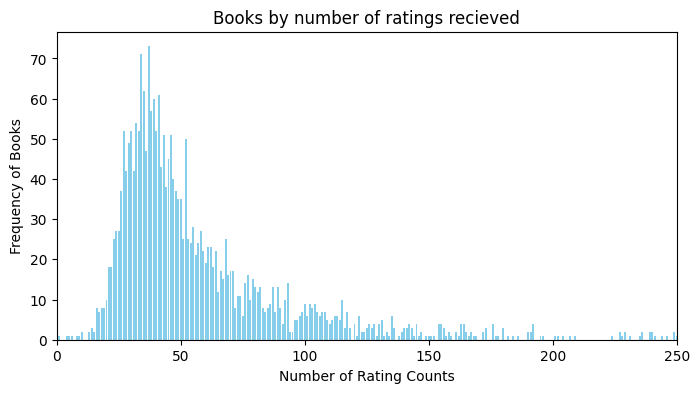

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by each book and counts how many ratings each book has recieved
book_rating_counts = final_rating.groupby('Book-Title')['Book-Rating'].count()

# Calculate how many books fall into each rating count category and then sorts these counts
rating_frequencies = book_rating_counts.value_counts().sort_index()

# Plotting the histogram
plt.figure(figsize=(8, 4))
plt.bar(rating_frequencies[:500].index, rating_frequencies[:500].values, color='skyblue')

plt.xlim(0, 250)

# Adding titles and labels
plt.title('Books by number of ratings recieved')
plt.xlabel('Number of Rating Counts')
plt.ylabel('Frequency of Books')

# Display the plot
plt.show()

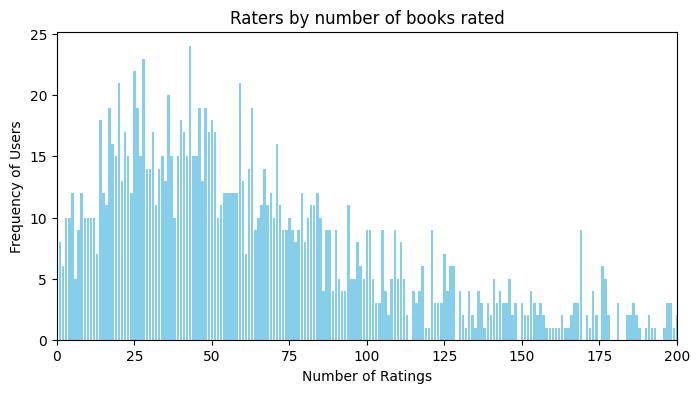

In [ ]:
# Group the data by each user and counts how many ratings each user has given
user_rating_counts = final_rating.groupby('User-ID')['Book-Rating'].count()

# Calculate how many users fall into each rating count category and then sorts these counts
rating_frequencies = user_rating_counts.value_counts().sort_index()


# Plotting the histogram
plt.figure(figsize=(8, 4))
plt.bar(rating_frequencies.index, rating_frequencies.values, color='skyblue')

plt.xlim(0, 200)

# Adding titles and labels
plt.title('Raters by number of books rated')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency of Users')

# Display the plot
plt.show()

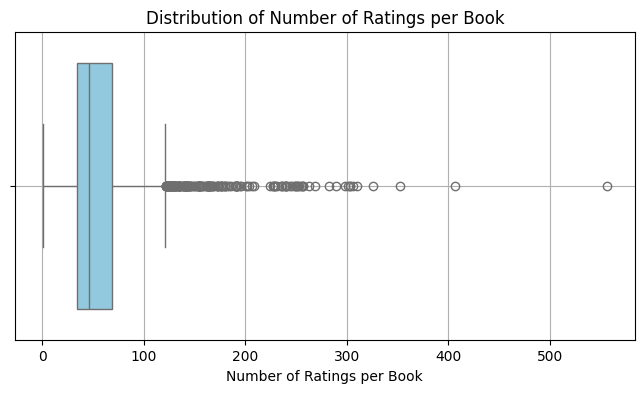

In [ ]:
# Count the number of ratings per book
book_rating_counts = final_rating.groupby('Book-Title')['Book-Rating'].count().reset_index()

# Rename columns for clarity
book_rating_counts.columns = ['Book-Title', 'Number of Ratings']

# Plotting the boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x='Number of Ratings', data=book_rating_counts, color='skyblue')
plt.xlabel('Number of Ratings per Book')
plt.title('Distribution of Number of Ratings per Book')
plt.grid(True)
plt.show()

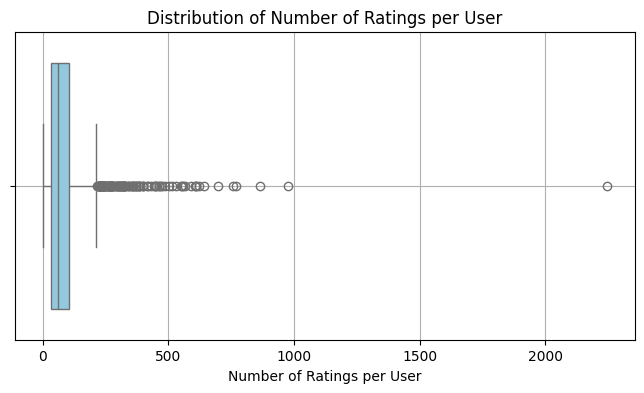

In [ ]:
# Count the number of ratings per user
user_rating_counts = final_rating.groupby('User-ID')['Book-Rating'].count().reset_index()

# Rename columns for clarity
user_rating_counts.columns = ['User-ID', 'Number of Ratings']

# Plotting the boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x='Number of Ratings', data=user_rating_counts, color='skyblue')
plt.xlabel('Number of Ratings per User')
plt.title('Distribution of Number of Ratings per User')
plt.grid(True)
plt.show()

In [ ]:
test_preds = clusterer_KMeans.predict(test_rate)
test_indices = test_rate.index
test_cluster = pd.DataFrame(data=test_preds, columns=['cluster'], index=test_indices)

Test_KMeans_score = silhouette_score(test_rate, test_preds)

print(f'Silhouette Score for the test set is: {Test_KMeans_score}')
test_cluster.head()


Silhouette Score for the test set is: 0.03173094199983784


,cluster
Book-Title,
Stuart Little,6
The Forest House,5
The Thief of Always,6
Different Seasons,2
Pope Joan (Ballantine Reader's Circle),6


In [ ]:
%%time
def recommend_books(book_name, book_pivot_table, preds, n_recommendations=10):
    # Check if the book is in the pivot table
    if book_name not in book_pivot_table.index:
        return np.array([f"The book '{book_name}' is not in the dataset :/"])

    # Find the cluster of the given book
    book_cluster = preds.loc[book_name, 'cluster']

    # Get all the books in the same cluster
    cluster_books = preds[preds['cluster'] == book_cluster].index

    # Calculate similarity scores within the cluster
    book_vector = book_pivot_table.loc[book_name].values.reshape(1, -1)

    cluster_vectors = book_pivot_table.loc[cluster_books].values

    similarity_scores = np.dot(cluster_vectors, book_vector.T).flatten()

    # Sort the books by similarity scores
    similar_books_indices = np.argsort(-similarity_scores)[1:n_recommendations+1]  # Skip the first one as it's the book itself

    similar_books = cluster_books[similar_books_indices]

    return list(similar_books)


CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.54 µs


In [ ]:
# Example usage:
book_name = 'Cradle and All'
recommended_books = recommend_books(book_name, book_pivot_table, preds, n_recommendations=10)
print(f"Books similar to '{book_name}':")
for i, book in enumerate(recommended_books):
    print(f"{i+1}. {book}")

Books similar to 'Cradle and All':
1. The Pelican Brief
2. The Client
3. When the Wind Blows
4. The Partner
5. The Testament
6. The Runaway Jury
7. Dolores Claiborne
8. A Time to Kill
9. The Chamber
10. The Street Lawyer


In [ ]:
pickle.dump(book_pivot_table, open('book_pivot_table.pkl', 'wb'))
pickle.dump(books_df, open('books.pkl', 'wb'))
pickle.dump(recommended_books, open('similarity_score.pkl', 'wb'))